# Residuals related assumptions

In this notebook, we work on the linear regression assumptions related to the residuals of a model.

The residuals of a reliable linear regression model should be

- normally distributed
- not auto-correlated
- and with a constant variance

We work on the Sales ~ sqrtTV + Radio + TV:Newspaper model, which is the best we've designed so far.

Let's import the packages and load the advertising dataset into a pandas dataframe


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms


df = pd.read_csv('./data/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


We run the regression and get the following result summary.

In [2]:
result = smf.ols('Sales ~ np.sqrt(TV) + Radio + TV:Newspaper' , data = df).fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     876.7
Date:                Thu, 18 Jul 2019   Prob (F-statistic):          2.89e-113
Time:                        16:03:14   Log-Likelihood:                -346.84
No. Observations:                 200   AIC:                             701.7
Df Residuals:                     196   BIC:                             714.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.3430      0.346     -3.880      0.000      -2.026      -0.660
np.sqrt(TV)      0.9368      0.029     31.832      0.000       0.879       0.995
Radio            0.1902      0.007     27.553      0.000       0.177       0.204
TV:Newspaper  5.644e-05   2.58e-05      2.187      0.030    5.55e-06       0.000
==============================================================================
Omnibus:                        5.590   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                6.074
Skew:                          -0.250   Prob(JB):                       0.0480
Kurtosis:                       3.692   Cond. No.                     2.37e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Normality of the residuals


Let's first check the normality of the residuals.

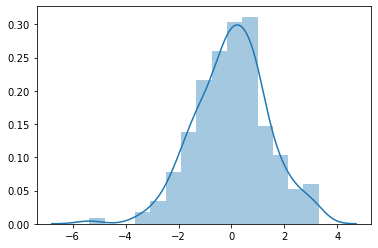

In [3]:
sns.distplot(result.resid)

The Jarque Bera statistic tests
that the residuals have the skewness and kurtosis of a Normal distribution.


The JB test for our model has a pvalue of 0.048, very close to the 0.05 threshold.


In [5]:
sms.jarque_bera(result.resid)[1]

0.04797124511944102

So we cannot reject the null hypothesis that the distribution of the residuals
is shaped like a normal distribution.

To confirm that let's run a Kolmogorov Smirnoff test on the residuals


In [7]:
from scipy import stats
stats.kstest(result.resid , 'norm')

KstestResult(statistic=0.08135122894405838, pvalue=0.13407824555999018)

The p-value of 0.134 also means that we **cannot** reject the null hypothesis
that the residuals are normally distributed.

We reach the same conclusion with both tests
and it's fair to assume that the residuals are close to being normally distributed

## Auto correlation of the residuals

The next assumption we would like to check is that
the residuals are not correlated.

We can do that with the Durbin-Watson test


In [8]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(result.resid, axis=0)


2.063722393242939

which gives a value of 2.06

indicating that the residuals are not auto correlated


## heteroskedasticity

Finally we can check  the heteroskedasticity assumption
This assumption means that the
spread of the residuals should stay constant.

If we plot the residuals vs fitted values plot for our model we get


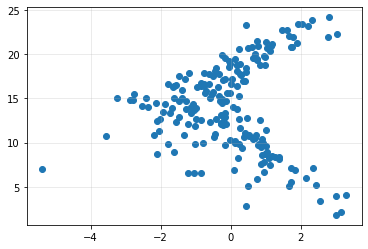

In [10]:
plt.scatter(result.resid, result.fittedvalues)
plt.grid(alpha = 0.3)

we definitely see that the spread of the residuals increases with the fitted values.

We have a case of heteroskedasticity

Now heteroskedasticity does not mean our model should be thrown out
just that there's more work that could be done to improve it.


# conclusion
So as a conclusion, our newest model

```Sales ~ sqrtTV + Radio + TV:Newspaper```

is pretty good.

We explain 93% of the variance in the Sales variable
and besides a problem of heteroskedasticity
all the assumptions of linear regression are basically satisfied.

